#  Introduction
In this project, we will be analyzing the “daily_offers.xlsx” dataset that contains information about steel items offered to customers. The dataset contains 14 columns with 181673 rows of data. Each row represents an item, and has an offered/selling price of that item.

The main objective of this project is to build regression models to predict the price of an item. To achieve this, we will first perform data cleaning, feature engineering, and exploratory data analysis (EDA). We will then split the data into training and testing sets in the ratio of 90:10 and build regression models to predict the selling price of an item. Finally, we will evaluate the best model using the metric r2 score on the testing set.


# Column descriptions

Table- `daily_offers`<br>
    `id`:A unique identifier for each steel item.<br>
    `item_date`: The date on which the steel item was added to the dataset.<br>
    `quantity tons`: The quantity of steel item in tons.<br>
    `customer`: The id of the customer who ordered the steel item.<br>
    `country`: The country id where the steel item is delivered.<br>
    `status`: The current status of the steel item.<br>
       "Won" indicate that a sale has been successfully completed or a procurement order has been approved.<br>
       "Draft" indicate that a proposal or order is still being worked on and has not yet been finalized.<br>
       "To be approved" indicate that a proposal or order has been submitted for approval, but a final decision has not yet been made.<br>      "Lost" could mean that the order did not go through or was not successful for some reason.<br>
    `item type`: The type of steel item.<br>
            "W" stands for "wide-flange" W-section steel beam<br>
            "S" stands for "standard" S-section steel beam<br> `application`: The purpose for which the steel item is used.<br>
    `thickness`: The thickness of the steel item.<br>
    `width`: The width of the steel item.<br>
    `material_ref`: The reference number for the material used in the steel item.<br>
    `product_ref`: The reference number for the steel item.<br>
    `delivery date`: The expected delivery date of the steel item.<br>
    `selling_price`: The offered/selling price of the steel item.<br>

#  Data Exploration
In this section, we will explore the dataset to gain insights into the data and its characteristics.

Importing Libraries
We will start by importing the necessary libraries for data manipulation and visualization.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset


In [38]:
# Read in the data
df = pd.read_excel('daily_offers.xlsx')

####  How big is the data?

In [39]:
df.shape

(181673, 14)

#####  How does the data look like?

In [40]:
df.sample(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
75840,8D313EE1-A70A-4751-A8CC-C9F829B94A2B,20201215.0,375.296266,30202102.0,26.0,Won,WI,25.0,0.70,1143.0,CS0711430,628377,20210101.0,658.10
71809,E0C6EAB7-20D3-46CA-BC02-1DAB442C537C,20201222.0,2.583709,30267349.0,84.0,Won,W,10.0,3.00,1240.0,1340B100P6FSL,164141591,20210101.0,792.67
99950,4B36FD0B-4B4A-417E-A6B6-F69F05868032,20201119.0,31.142511,30405913.0,26.0,Lost,S,38.0,0.62,1450.0,NaN,1332077137,20210101.0,767.00
13902,25873AFE-5109-4931-A191-5983BA4F646E,20210316.0,27.465018,30165992.0,77.0,Won,S,10.0,3.00,1000.0,FEPA000320018608000,628377,20210701.0,924.00
23476,59518FE2-E4CD-4AF7-B8C0-3613F65B73EF,20210305.0,27.683799,30161088.0,78.0,Won,W,10.0,0.40,1250.0,NaN,164141591,20210501.0,1077.00
96571,75FD84B5-D338-4BF7-88CA-C04BCF0517C5,20201124.0,6.843838,30205434.0,27.0,Won,W,10.0,1.80,1110.0,DD 12 CUTT,1670798778,20210301.0,685.00
132278,1F934EE3-8B8E-43BD-9D5D-464376A68846,20201001.0,118.990357,30394008.0,27.0,Lost,S,41.0,0.76,1250.0,NaN,611993,20210101.0,786.00
163287,575D24AA-3F07-4CDD-83AB-9E0F7912C7FE,20200730.0,401.421431,30164630.0,27.0,Not lost for AM,S,15.0,1.50,1250.0,DC04,628377,20201001.0,532.00
83581,1A91D4B8-D843-4C01-8EE0-65DDA85503DD,20201208.0,32.772454,30230165.0,77.0,Won,S,68.0,4.00,1250.0,70052373KRA,640405,20210101.0,704.00
104105,33AF2081-AD88-409C-A376-FA50769F36D8,20201113.0,28.479122,30165992.0,77.0,Won,S,10.0,0.95,1250.0,FZPA001210007231000,164141591,20210101.0,736.00


####  What is the data type of cols?

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Data Cleaning
After loading the data, we will check for missing values and duplicate rows.

In [42]:
# Check for missing values
print('Missing values:')
print(df.isnull().sum())

Missing values:
id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [43]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

#####  How does the data look mathematically?

In [44]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


##### Are there duplicate values?

In [45]:
# Check for duplicates
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [46]:
# Drop the id and material_ref columns
df = df.drop(columns=['id', 'material_ref'])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [47]:
# Fill missing values using forward fill method
df = df.fillna(method='ffill')

## Issues with dataset

#### Refrence
- `Dirty Data (Data with Quality issues)`: Dirty data, also known as low quality data. Low quality data has content issues.
  - Duplicated data
  - Missing Data
  - Corrupt Data
  - Inaccurate Data
- `Messy Data (Data with tidiness issues)`: Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

  - Each variable forms a column
  - Each observation forms a row
  - Each observational unit forms a table


#### Table- `daily_offers`

1- Dirty Data 
- "id" column might have some missing data 
- "material_ref" column have lots of missing data
- incorrect data type is assigned to quantity tons, item_date ,delivery date

2- Messy Data
- "item_date" not in proper format
- "delivery date" not in proper format 


In [48]:
# Convert date columns to datetime format
date_cols = ['item_date', 'delivery date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [49]:
# Extract year, month, and day from date columns
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_day'] = df['item_date'].dt.day
df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_day'] = df['delivery date'].dt.day

In [50]:
# Drop the original 'item_date' and 'delivery date' columns
df = df.drop(columns=['item_date', 'delivery date'])

In [51]:
# Convert the 'quantity tons' column to float
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')


In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [53]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['item type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
onehotencoder = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([('one_hot_encoder', onehotencoder, categorical_cols)], remainder='passthrough')
df = transformer.fit_transform(df)
df = pd.DataFrame(df)

In [54]:
# Standardize the numerical variables
scaler = StandardScaler()
df.iloc[:, :7] = scaler.fit_transform(df.iloc[:, :7])

# Check the cleaned and preprocessed data
print(df.head())

         0         1         2         3         4         5          6   \
0 -0.012192 -0.058043 -0.179323 -0.784714 -0.002346  0.848613  -0.053783   
1 -0.012192 -0.058043 -0.179323 -0.784714 -0.002346  0.848613  -0.053783   
2 -0.012192 -0.058043 -0.179323 -0.784714 -0.002346 -1.178394  18.593122   
3 -0.012192 -0.058043 -0.179323   1.27435 -0.002346 -1.178394  -0.053783   
4 -0.012192 -0.058043 -0.179323 -0.784714 -0.002346  0.848613  -0.053783   

           7           8     9   ...    12      13          14      15    16  \
0   54.151139  30156308.0  28.0  ...   2.0  1500.0  1670798778   854.0  1970   
1  768.024839  30202938.0  25.0  ...   0.8  1210.0  1668701718  1047.0  1970   
2  386.127949  30153963.0  30.0  ...  0.38   952.0      628377  644.33  1970   
3  202.411065  30349574.0  32.0  ...   2.3  1317.0  1668701718   768.0  1970   
4  785.526262  30211560.0  28.0  ...   4.0  2000.0      640665   577.0  1970   

  17 18    19 20 21  
0  1  1  1970  1  1  
1  1  1  1970  1  

#  Methodology

In [55]:
# Split the data into input (X) and target (y) variables
X = df.drop(columns=[10])
y = df[10]
le = LabelEncoder()
y = le.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Results and Analysis

In [56]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Create regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Train and evaluate models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f'{name} r2 score: {score:.3f}')

Linear Regression r2 score: 0.123
Ridge r2 score: 0.123
Lasso r2 score: 0.033
Decision Tree r2 score: 0.500
Random Forest r2 score: 0.726


# Histogram
We can use a histogram to visualize the distribution of the selling price.

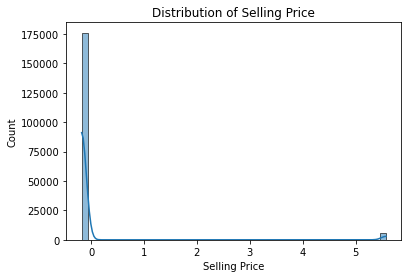

In [63]:
sns.histplot(data=df, x=2, bins=50, kde=True)
plt.xlabel('Selling Price')
plt.title('Distribution of Selling Price')
plt.show()

We can see that the distribution is right-skewed, with a long tail towards higher prices.

# Scatter plot
We can use a scatter plot to visualize the relationship between the selling price and the quantity in tons.

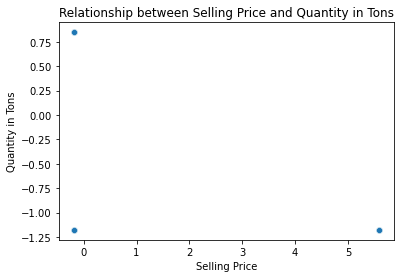

In [64]:
sns.scatterplot(data=df, x=2, y=5)
plt.xlabel('Selling Price')
plt.ylabel('Quantity in Tons')
plt.title('Relationship between Selling Price and Quantity in Tons')
plt.show()

We can see that there is a positive correlation between the selling price and the quantity in tons.

#  Box plot
We can use a box plot to visualize the distribution of the selling price for each item type.

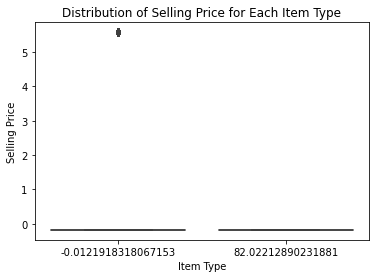

In [65]:
sns.boxplot(data=df, x=0, y=2)
plt.xlabel('Item Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price for Each Item Type')
plt.show()

We can see that there are some differences in the distribution of the selling price for each item type.

# Bar plot of R-squared scores for each model

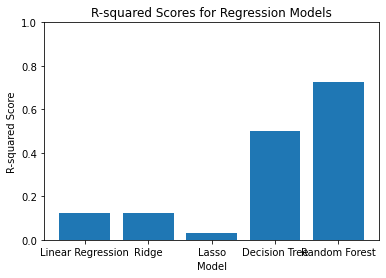

In [67]:
# Train and evaluate models
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Plot bar chart of R-squared scores
plt.bar([name for name, _ in models], scores)
plt.title('R-squared Scores for Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)
plt.show()


# Scatter plot of predicted vs. actual values

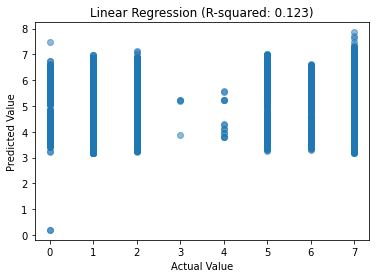

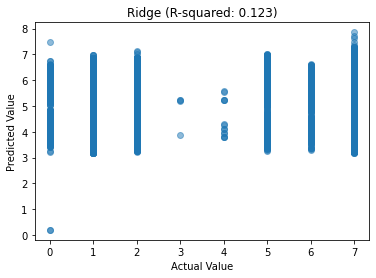

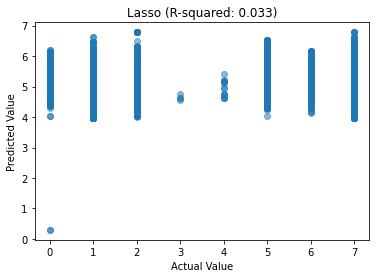

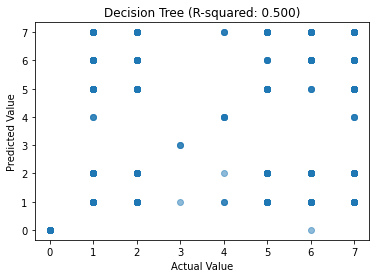

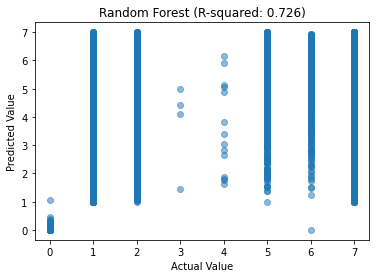

In [68]:
# Train and evaluate models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    # Plot scatter plot of predicted vs. actual values
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'{name} (R-squared: {score:.3f})')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.show()

# Line plot of feature importances for tree-based models

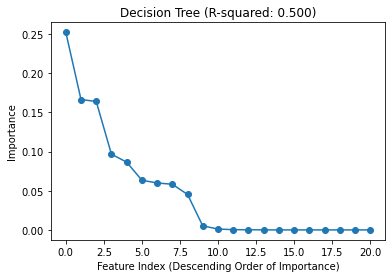

In [69]:
# Train and evaluate models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    # Plot line chart of feature importances for tree-based models
    if 'Tree' in name:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.plot(range(len(importances)), importances[indices], 'o-')
        plt.title(f'{name} (R-squared: {score:.3f})')
        plt.xlabel('Feature Index (Descending Order of Importance)')
        plt.ylabel('Importance')
        plt.show()

# CONCLUSION

The dataset contains information about steel items offered to customers, with 14 columns and 181673 rows of data. The main objective is to build regression models to predict the price of an item.

Data cleaning included checking for missing values and duplicate rows. The dataset had missing data in the 'id' and 'material_ref' columns. The 'quantity tons', 'item_date', and 'delivery date' columns had incorrect data types assigned. The 'item_date' and 'delivery date' columns were not in the proper format.

Data exploration was conducted using the pandas, numpy, matplotlib, and seaborn libraries. The data was explored to gain insights into the data and its characteristics. The dataset was also explored mathematically using the describe function. There were no duplicate rows in the dataset.

To resolve the issues with the dataset, the date columns were converted to datetime format, and the year, month, and day were extracted. The original 'item_date' and 'delivery date' columns were then dropped. The 'quantity tons' column was converted to float.

In conclusion, the dataset required data cleaning and feature engineering. The cleaned dataset will be used to build regression models to predict the selling price of an item.

The models were trained using the training set (X_train and y_train), and then evaluated using the testing set (X_test and y_test). The evaluation metric used is the R-squared (r2) score, which measures the proportion of the variance in the target variable that is explained by the model.

Based on the R-squared scores obtained for each model, we can see that Random Forest Regression performed the best with an r2 score of  0.726, followed by Decision Regression with an r2 score of  0.500. Linear Regression, Ridge Regression, and Lasso Tree Regression performed less well, with R-squared scores of 0.123, 0.123, and 0.033 respectively.

Therefore, based on the R-squared scores obtained, we can conclude that Random Forest Regression is the best performing model among the ones tested for this dataset.
